In [2]:
from region_utils.shapes import Circle, ConvexPolygon
from region_utils.region import Domain, Subdomain
import jax.numpy as np
import numpy as onp
import json

In [51]:
#vertecies of domain in counter clockwise order
v1 = [0,0]
v2 = [2.2,0]
v3 = [2.2, 0.41]
v4 = [0, 0.41]

domain_points = np.asarray([v1, v2, v3, v4])
Cylinder = Circle(center=np.array([0.2, 0.2]), radius=0.1, has_boundary=True)
OuterRectangle = ConvexPolygon(domain_points, list(range(4)))


#### Domain with matching dimensionality of problem in [Physics Informed Deep Learning (Part II):](https://arxiv.org/pdf/1711.10566.pdf) 

$x \in [1, 8]$, $y \in [-2, 2]$ ( $t \in [0, 19]$ )

Without subdomain decomposition (@JunmiaoHu)

In [32]:
subdomain0 = Subdomain([OuterRectangle], [Cylinder])
domain = Domain([subdomain0])

In [48]:
domain.create_boundary(100)
domain.create_interior(500, [0, 0], [2.2, 0.41])

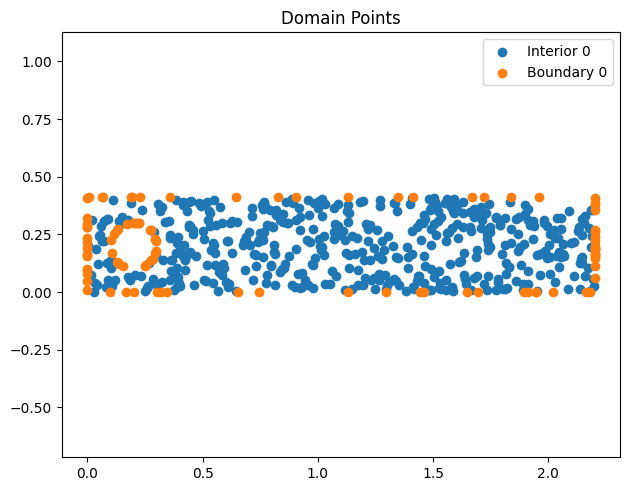

In [49]:
import matplotlib.pyplot as plt

plt.axis("equal")
# tight layout
plt.tight_layout()

domain.plot()

In [50]:
#t_vals = np.array(onp.random.uniform(0, 1, 50))
#boundary_cylinder = np.array([Cylinder._boundary_func(t) for t in t_vals])

In [12]:
from utils import data_path

domain.write_to_file(data_path / "navier_stokes_pinn_train.json")

We need to add temporal dimention to data. As the code for generating 2d data is very
object oriented I suggest we do this manually with uglier ux

In [57]:
def add_temporal_dimension_training_data(input_file):
    str_rep = str(input_file)
    wo_suff = str_rep.removesuffix(".json")
    outfile = f"{wo_suff}_w_temporal.json"
    with open(input_file, "r") as infile:
        data = json.load(infile)
        for p in data['XPINNs']:
            for point in p['Internal points']:
                point.append(float(onp.random.uniform(0, 5)))
            for point in p['Boundary points']:
                point.append(float(onp.random.uniform(0, 5)))
                
        for s in data['Interfaces']:
            for point in s['Points']:
                point.append(float(onp.random.uniform(0, 5)))
                
    with open(outfile, "w") as outfile:
        json.dump(data, outfile)

Sanity check on XPINN_template

In [15]:
file = data_path / "XPINN_template.json"
add_temporal_dimension_training_data(file)

outfile = data_path / "XPINN_template_w_temporal.json"
with open(outfile, "r") as infile:
        data = json.load(infile)
        print(data)

{'XPINNs': [{'Internal points': [[0.5, 0.5, 2.1799197118159626], [0.7, 0.6, 1.872591404573702], [0.8, 0.9, 0.04781526378821899]], 'Boundary points': [[0, 0, 1.7262646665989922], [1, 0, 3.8469655173081896], [0.5, 0, 2.1487297681580078]]}, {'Internal points': [[0.5, 1.5, 0.49571082442505576], [0.7, 1.6, 0.4871699176174493], [0.8, 1.9, 1.1092964304177888]], 'Boundary points': [[1, 2, 2.9937722144354897], [1.5, 2, 3.6528525728932024], [0.5, 2, 3.364862690758205]]}], 'Interfaces': [{'XPINNs': [0, 1], 'Points': [[1, 1, 1.4109702139684177], [0.2, 1, 0.7165914776644117], [1.5, 1, 4.600243177390456]]}]}


In [17]:
file = data_path / "navier_stokes_pinn_train.json"
add_temporal_dimension_training_data(file)